In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
root_dir = '/Users/iDev/repos/pgm-fmri/data/fmri/'

def storeData(object, file_name, root_dir):
    with open(root_dir+file_name, 'wb') as f:
        pickle.dump(object, f)					 
        f.close() 

def loadData(file_name, root_dir): 
    with open(root_dir+file_name, 'rb') as f:
        db = pickle.load(f) 
        f.close()
        return db

In [3]:
data = loadData('fmriall_hps_B32_S0_ILC', root_dir=root_dir)

In [4]:
data[0]

{'thresh': 0.0,
 'l1': 0.1,
 'l2': 0.1,
 'params': [FlatMapping({
    'linear': FlatMapping({
                'b': array([-1.1641532e-10,  6.9616362e-08,  5.6868885e-07,  8.0419704e-07,
                             4.2084139e-07], dtype=float32),
                'w': array([[ 1.10849505e-05,  7.41972472e-04,  3.74873402e-04,
                              5.36495470e-04, -7.78466463e-04],
                            [ 9.56351520e-04, -4.56641777e-04,  2.25217082e-05,
                             -8.87517934e-04,  7.35120033e-04],
                            [-3.76558397e-04, -9.83443693e-04,  6.35465607e-04,
                             -3.22305947e-04, -2.06644181e-04],
                            ...,
                            [-6.29448565e-04,  6.64430438e-04,  5.65769034e-04,
                             -8.22325470e-04,  7.69499573e-04],
                            [-8.46937124e-04,  7.27173290e-04, -4.52839653e-04,
                             -5.27857337e-05, -3.94970411e-05],


In [5]:
np.array(data[0]['training_accuracies'])

array([[0.     , 0.65625, 0.65625, 0.4375 , 0.71875, 0.59375, 0.59375,
        0.75   , 0.375  , 0.65625]], dtype=float32)

In [6]:
data[0]['training_accuracies']

[[array(0., dtype=float32),
  array(0.65625, dtype=float32),
  array(0.65625, dtype=float32),
  array(0.4375, dtype=float32),
  array(0.71875, dtype=float32),
  array(0.59375, dtype=float32),
  array(0.59375, dtype=float32),
  array(0.75, dtype=float32),
  array(0.375, dtype=float32),
  array(0.65625, dtype=float32)]]

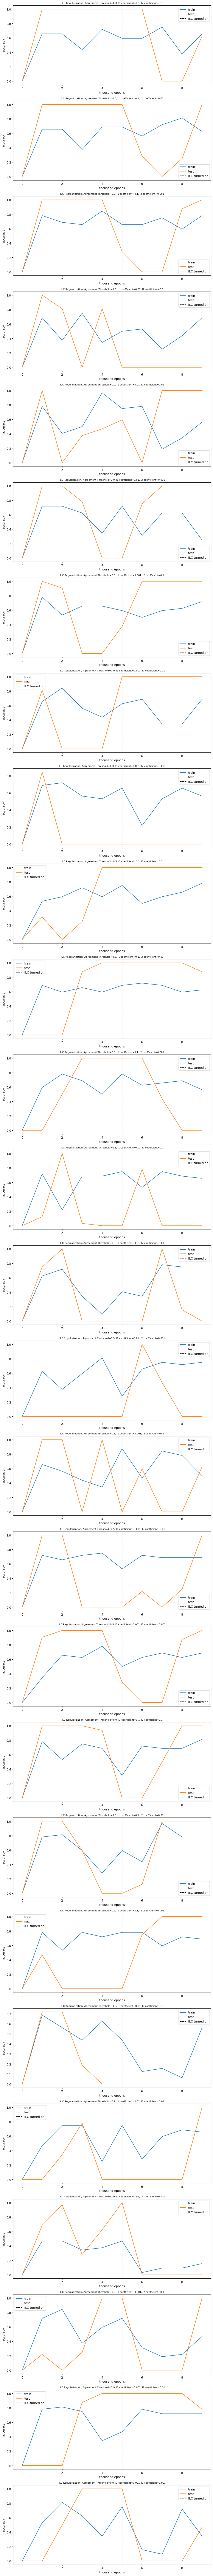

In [7]:
fig, axes = plt.subplots(len(data), 1, figsize=(10, 120), dpi=100, facecolor='w', edgecolor='k')

num=0
for i, experiment in enumerate(data):
  num += 1
  axes[i].plot(np.arange(len(experiment['training_accuracies'][0])), experiment['training_accuracies'][0])
  axes[i].plot(np.arange(len(experiment['testing_accuracies'][0])), experiment['testing_accuracies'][0])
  axes[i].axvline(x=5, color='k', linestyle='--')
  
  one = experiment['thresh']
  two = experiment['l1']
  three = experiment['l2']
  axes[i].set_title('ILC Regularization, Agreement Threshold={}, l1 coefficient={}, l2 coefficient={}'.format(one,two,three),{'fontsize': 8})
  axes[i].legend(('train', 'test', 'ILC turned on'))
  axes[i].set_xlabel('thousand epochs')
  axes[i].set_ylabel('accuracy')

#   plt.suptitle('ILC Regularization, Agreement Threshold={}, l1 coefficient={}, l2 coefficient={}'.format(one,two,three))

# plt.savefig(f'{num}.png')
plt.tight_layout()
plt.savefig('results.png')
plt.show()

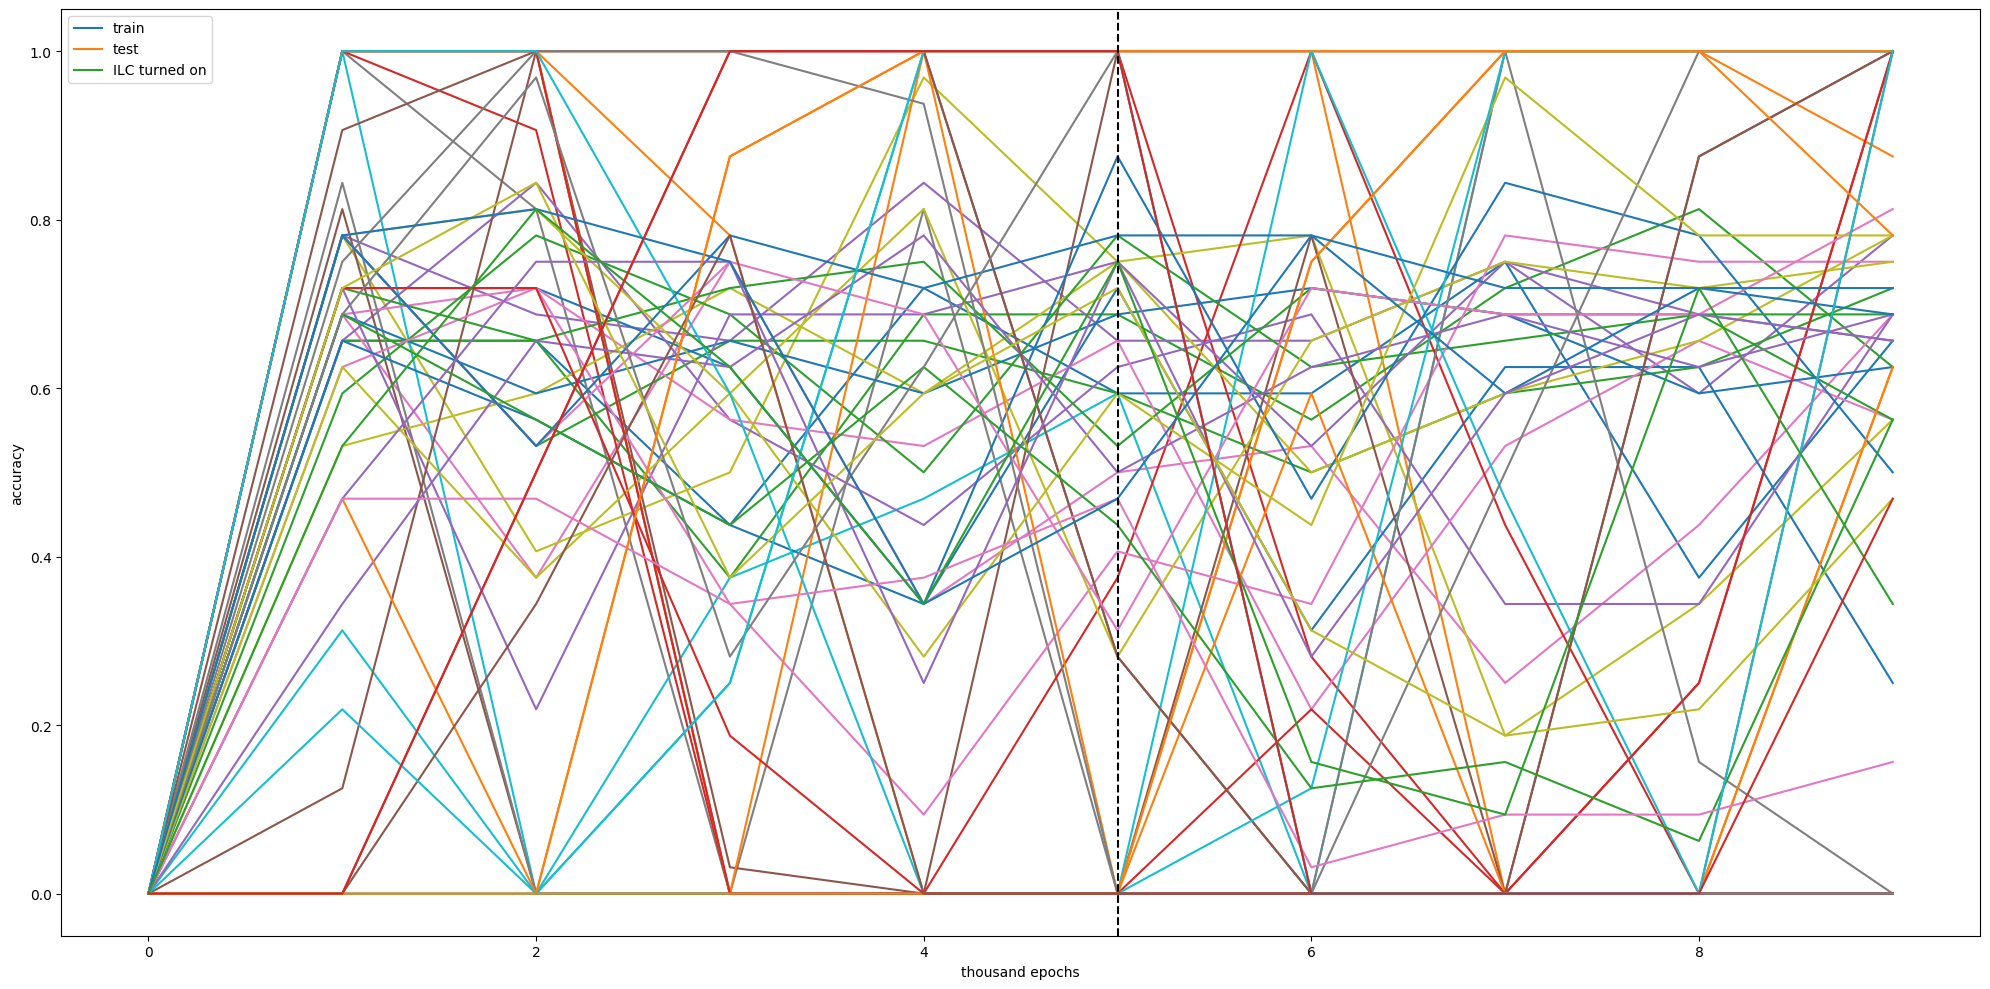

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')

num=0
for i, experiment in enumerate(data):
  num += 1
  axes.plot(np.arange(len(experiment['training_accuracies'][0])), experiment['training_accuracies'][0])
  axes.plot(np.arange(len(experiment['testing_accuracies'][0])), experiment['testing_accuracies'][0])
  
  
  one = experiment['thresh']
  two = experiment['l1']
  three = experiment['l2']
#   axes.set_title('ILC Regularization, Agreement Threshold={}, l1 coefficient={}, l2 coefficient={}'.format(one,two,three),{'fontsize': 8})
  axes.legend(('train', 'test', 'ILC turned on'))
  axes.set_xlabel('thousand epochs')
  axes.set_ylabel('accuracy')

#   plt.suptitle('ILC Regularization, Agreement Threshold={}, l1 coefficient={}, l2 coefficient={}'.format(one,two,three))

# plt.savefig(f'{num}.png')
axes.axvline(x=5, color='k', linestyle='--')
plt.tight_layout()
plt.savefig('results.png')
plt.show()

In [9]:
df = pd.DataFrame.from_dict(data)

In [10]:
df.head()

thresh    l1     l2      params  \
0     0.0  0.10  0.100  [(linear)]   
1     0.0  0.10  0.010  [(linear)]   
2     0.0  0.10  0.001  [(linear)]   
3     0.0  0.01  0.100  [(linear)]   
4     0.0  0.01  0.010  [(linear)]   

                                 training_accuracies  \
0  [[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.59...   
1  [[0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875...   
2  [[0.0, 0.78125, 0.6875, 0.65625, 0.84375, 0.65...   
3  [[0.0, 0.6875, 0.375, 0.75, 0.34375, 0.5, 0.53...   
4  [[0.0, 0.78125, 0.40625, 0.5, 0.96875, 0.75, 0...   

                                  testing_accuracies  
0  [[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0,...  
1  [[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, ...  
2  [[0.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0.0, ...  
3  [[0.0, 1.0, 0.8125, 0.0, 0.8125, 0.0, 0.0, 0.0...  
4  [[0.0, 1.0, 0.0, 0.375, 0.46875, 0.59375, 0.0,...

In [11]:
df["training_accuracies"] = df["training_accuracies"].apply(pd.Series)
df["testing_accuracies"] = df["testing_accuracies"].apply(pd.Series)

In [12]:
df.convert_dtypes().dtypes

thresh                 float64
l1                     float64
l2                     float64
params                  object
training_accuracies     object
testing_accuracies      object
dtype: object

In [13]:
df.head()

thresh    l1     l2      params  \
0     0.0  0.10  0.100  [(linear)]   
1     0.0  0.10  0.010  [(linear)]   
2     0.0  0.10  0.001  [(linear)]   
3     0.0  0.01  0.100  [(linear)]   
4     0.0  0.01  0.010  [(linear)]   

                                 training_accuracies  \
0  [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...   
1  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...   
2  [0.0, 0.78125, 0.6875, 0.65625, 0.84375, 0.656...   
3  [0.0, 0.6875, 0.375, 0.75, 0.34375, 0.5, 0.531...   
4  [0.0, 0.78125, 0.40625, 0.5, 0.96875, 0.75, 0....   

                                  testing_accuracies  
0  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
1  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...  
2  [0.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0.0, 0...  
3  [0.0, 1.0, 0.8125, 0.0, 0.8125, 0.0, 0.0, 0.0,...  
4  [0.0, 1.0, 0.0, 0.375, 0.46875, 0.59375, 0.0, ...

In [14]:
edf = df.explode('training_accuracies')
udf = df.explode('testing_accuracies')

In [15]:
edf.head()

thresh   l1   l2      params training_accuracies  \
0     0.0  0.1  0.1  [(linear)]                 0.0   
0     0.0  0.1  0.1  [(linear)]             0.65625   
0     0.0  0.1  0.1  [(linear)]             0.65625   
0     0.0  0.1  0.1  [(linear)]              0.4375   
0     0.0  0.1  0.1  [(linear)]             0.71875   

                                  testing_accuracies  
0  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
0  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
0  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
0  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
0  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...

In [16]:
udf.head()

thresh   l1   l2      params  \
0     0.0  0.1  0.1  [(linear)]   
0     0.0  0.1  0.1  [(linear)]   
0     0.0  0.1  0.1  [(linear)]   
0     0.0  0.1  0.1  [(linear)]   
0     0.0  0.1  0.1  [(linear)]   

                                 training_accuracies testing_accuracies  
0  [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...                0.0  
0  [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...                1.0  
0  [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...                1.0  
0  [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...                1.0  
0  [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...                1.0

In [17]:
import seaborn as sn
sn.set()

In [18]:
edf.index.name = 'index'
udf.index.name = 'index'

In [19]:
edf['training_accuracies'] = edf['training_accuracies'].astype(float)
udf['testing_accuracies'] = udf['testing_accuracies'].astype(float)

In [20]:
edf.head()

thresh   l1   l2      params  training_accuracies  \
index                                                      
0         0.0  0.1  0.1  [(linear)]              0.00000   
0         0.0  0.1  0.1  [(linear)]              0.65625   
0         0.0  0.1  0.1  [(linear)]              0.65625   
0         0.0  0.1  0.1  [(linear)]              0.43750   
0         0.0  0.1  0.1  [(linear)]              0.71875   

                                      testing_accuracies  
index                                                     
0      [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
0      [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
0      [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
0      [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...  
0      [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...

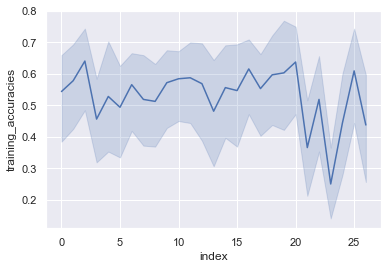

In [21]:
sn.lineplot(data=edf, x='index', y='training_accuracies')

In [22]:
edf['epoch'] = 0
udf['epoch'] = 0

In [23]:
edf.reset_index(inplace=True)
edf.count()

index                  270
thresh                 270
l1                     270
l2                     270
params                 270
training_accuracies    270
testing_accuracies     270
epoch                  270
dtype: int64

In [24]:
udf.reset_index(inplace=True)
udf.count()

index                  270
thresh                 270
l1                     270
l2                     270
params                 270
training_accuracies    270
testing_accuracies     270
epoch                  270
dtype: int64

In [25]:
edf['epoch'] = edf.groupby('index')['index'].cumcount()
edf['epoch'] += 1

In [26]:
udf['epoch'] = edf.groupby('index')['index'].cumcount()
udf['epoch'] += 1

In [27]:
edf.head(20)

index  thresh   l1    l2      params  training_accuracies  \
0       0     0.0  0.1  0.10  [(linear)]              0.00000   
1       0     0.0  0.1  0.10  [(linear)]              0.65625   
2       0     0.0  0.1  0.10  [(linear)]              0.65625   
3       0     0.0  0.1  0.10  [(linear)]              0.43750   
4       0     0.0  0.1  0.10  [(linear)]              0.71875   
5       0     0.0  0.1  0.10  [(linear)]              0.59375   
6       0     0.0  0.1  0.10  [(linear)]              0.59375   
7       0     0.0  0.1  0.10  [(linear)]              0.75000   
8       0     0.0  0.1  0.10  [(linear)]              0.37500   
9       0     0.0  0.1  0.10  [(linear)]              0.65625   
10      1     0.0  0.1  0.01  [(linear)]              0.00000   
11      1     0.0  0.1  0.01  [(linear)]              0.65625   
12      1     0.0  0.1  0.01  [(linear)]              0.65625   
13      1     0.0  0.1  0.01  [(linear)]              0.37500   
14      1     0.0  0.1  0.01  [(linear)]              0.68750   
15      1     0.0  0.1  0.01  [(linear)]              0.68750   
16      1     0.0  0.1  0.01  [(linear)]              0.56250   
17      1     0.0  0.1  0.01  [(linear)]              0.71875   
18      1     0.0  0.1  0.01  [(linear)]              0.81250   
19      1     0.0  0.1  0.01  [(linear)]              0.62500   

                                   testing_accuracies  epoch  
0   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...      1  
1   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...      2  
2   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...      3  
3   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...      4  
4   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...      5  
5   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...      6  
6   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...      7  
7   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...      8  
8   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...      9  
9   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...     10  
10  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...      1  
11  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...      2  
12  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...      3  
13  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...      4  
14  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...      5  
15  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...      6  
16  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...      7  
17  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...      8  
18  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...      9  
19  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0...     10

In [28]:
udf.head(20)

index  thresh   l1    l2      params  \
0       0     0.0  0.1  0.10  [(linear)]   
1       0     0.0  0.1  0.10  [(linear)]   
2       0     0.0  0.1  0.10  [(linear)]   
3       0     0.0  0.1  0.10  [(linear)]   
4       0     0.0  0.1  0.10  [(linear)]   
5       0     0.0  0.1  0.10  [(linear)]   
6       0     0.0  0.1  0.10  [(linear)]   
7       0     0.0  0.1  0.10  [(linear)]   
8       0     0.0  0.1  0.10  [(linear)]   
9       0     0.0  0.1  0.10  [(linear)]   
10      1     0.0  0.1  0.01  [(linear)]   
11      1     0.0  0.1  0.01  [(linear)]   
12      1     0.0  0.1  0.01  [(linear)]   
13      1     0.0  0.1  0.01  [(linear)]   
14      1     0.0  0.1  0.01  [(linear)]   
15      1     0.0  0.1  0.01  [(linear)]   
16      1     0.0  0.1  0.01  [(linear)]   
17      1     0.0  0.1  0.01  [(linear)]   
18      1     0.0  0.1  0.01  [(linear)]   
19      1     0.0  0.1  0.01  [(linear)]   

                                  training_accuracies  testing_accuracies  \
0   [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...             0.00000   
1   [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...             1.00000   
2   [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...             1.00000   
3   [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...             1.00000   
4   [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...             1.00000   
5   [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...             1.00000   
6   [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...             1.00000   
7   [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...             0.00000   
8   [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...             0.00000   
9   [0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...             0.62500   
10  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...             0.00000   
11  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...             1.00000   
12  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...             1.00000   
13  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...             1.00000   
14  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...             1.00000   
15  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...             1.00000   
16  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...             0.28125   
17  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...             0.00000   
18  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...             0.25000   
19  [0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...             1.00000   

    epoch  
0       1  
1       2  
2       3  
3       4  
4       5  
5       6  
6       7  
7       8  
8       9  
9      10  
10      1  
11      2  
12      3  
13      4  
14      5  
15      6  
16      7  
17      8  
18      9  
19     10

In [29]:
train_df = edf[['index', 'thresh', 'l1', 'l2', 'training_accuracies', 'epoch']].copy()

In [30]:
test_df = udf[['index', 'thresh', 'l1', 'l2', 'testing_accuracies', 'epoch']].copy()

In [31]:
train_df['set'] = 'training'
train_df = train_df.rename(columns={'training_accuracies': 'accuracy'})
train_df.head()

index  thresh   l1   l2  accuracy  epoch       set
0      0     0.0  0.1  0.1   0.00000      1  training
1      0     0.0  0.1  0.1   0.65625      2  training
2      0     0.0  0.1  0.1   0.65625      3  training
3      0     0.0  0.1  0.1   0.43750      4  training
4      0     0.0  0.1  0.1   0.71875      5  training

In [32]:
test_df['set'] = 'test'
test_df = test_df.rename(columns={'testing_accuracies': 'accuracy'})
test_df.head()

index  thresh   l1   l2  accuracy  epoch   set
0      0     0.0  0.1  0.1       0.0      1  test
1      0     0.0  0.1  0.1       1.0      2  test
2      0     0.0  0.1  0.1       1.0      3  test
3      0     0.0  0.1  0.1       1.0      4  test
4      0     0.0  0.1  0.1       1.0      5  test

In [33]:
complete_df = train_df.append(test_df, ignore_index=True)
complete_df.head()

index  thresh   l1   l2  accuracy  epoch       set
0      0     0.0  0.1  0.1   0.00000      1  training
1      0     0.0  0.1  0.1   0.65625      2  training
2      0     0.0  0.1  0.1   0.65625      3  training
3      0     0.0  0.1  0.1   0.43750      4  training
4      0     0.0  0.1  0.1   0.71875      5  training

In [36]:
complete_df['reg'] = complete_df["l1"].astype(str) + " , " + complete_df["l2"].astype(str)

In [37]:
complete_df.head()

index  thresh   l1   l2  accuracy  epoch       set        reg
0      0     0.0  0.1  0.1   0.00000      1  training  0.1 , 0.1
1      0     0.0  0.1  0.1   0.65625      2  training  0.1 , 0.1
2      0     0.0  0.1  0.1   0.65625      3  training  0.1 , 0.1
3      0     0.0  0.1  0.1   0.43750      4  training  0.1 , 0.1
4      0     0.0  0.1  0.1   0.71875      5  training  0.1 , 0.1

In [40]:
complete_df['method'] = 'ILC'

In [43]:
complete_df[complete_df['thresh'] == 0.0]['method'] = 'SGD'
complete_df.head()

/Users/iDev/miniconda3/envs/pgm/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


index  thresh   l1   l2  accuracy  epoch       set        reg method
0      0     0.0  0.1  0.1   0.00000      1  training  0.1 , 0.1    ILC
1      0     0.0  0.1  0.1   0.65625      2  training  0.1 , 0.1    ILC
2      0     0.0  0.1  0.1   0.65625      3  training  0.1 , 0.1    ILC
3      0     0.0  0.1  0.1   0.43750      4  training  0.1 , 0.1    ILC
4      0     0.0  0.1  0.1   0.71875      5  training  0.1 , 0.1    ILC

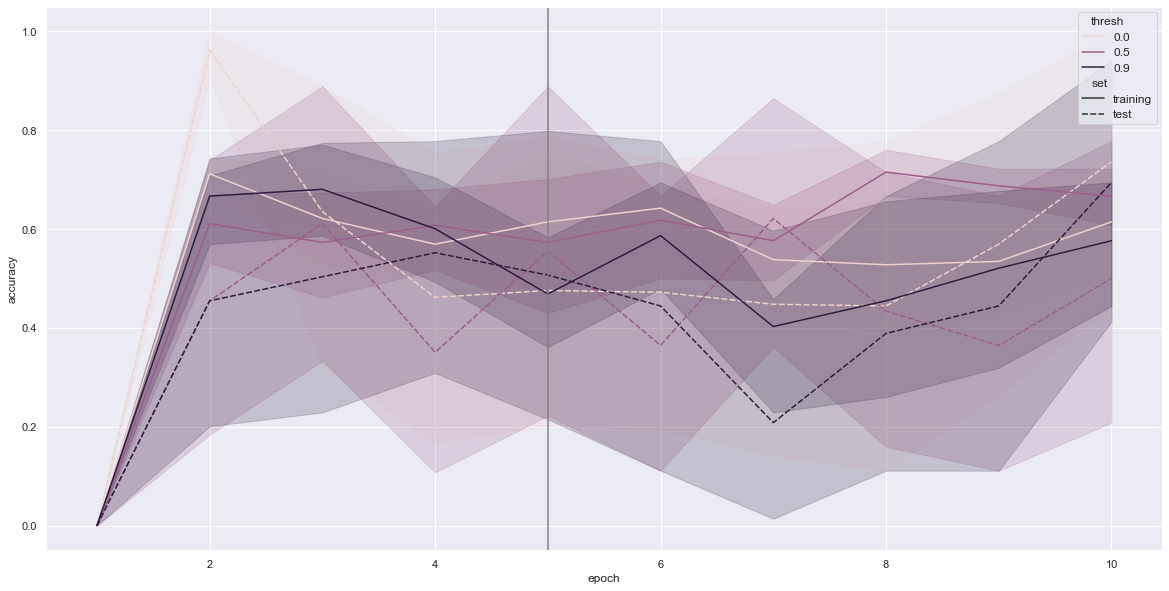

In [44]:
sn.set(rc={'figure.figsize':(20,10)})
sn.lineplot(x='epoch',y='accuracy',hue='thresh',style='set',data=complete_df)
plt.axvline(5,0,1,color='grey')
plt.savefig('sn.png', dpi=400)
# plt.title(title)

In [ ]:
sns.relplot(
    data=complete_df, x="timepoint", y="signal", col="region",
    hue="event", style="event", kind="line",
)

In [46]:
syn = np.load('/Users/iDev/repos/pgm-fmri/data/synthetic_results_1.pkl', allow_pickle=True)

In [59]:
syn[0]

{'E': 200,
 'K': 40,
 'n_informative': 5,
 'agreement': 0.2,
 'l1': 0.0001,
 'l2': 0.0001,
 'inv_weak_coef': 0.3,
 'rand_strong_coef': 3.0,
 'results': [{'Epoch': 0,
   'Method': 'SGD',
   'Accuracy': array(0.62, dtype=float32),
   'Set': 'Train'},
  {'Epoch': 1,
   'Method': 'SGD',
   'Accuracy': array(0.83, dtype=float32),
   'Set': 'Train'},
  {'Epoch': 2,
   'Method': 'SGD',
   'Accuracy': array(0.96999997, dtype=float32),
   'Set': 'Train'},
  {'Epoch': 3,
   'Method': 'SGD',
   'Accuracy': array(1., dtype=float32),
   'Set': 'Train'},
  {'Epoch': 4,
   'Method': 'SGD',
   'Accuracy': array(1., dtype=float32),
   'Set': 'Train'},
  {'Epoch': 5,
   'Method': 'SGD',
   'Accuracy': array(1., dtype=float32),
   'Set': 'Train'},
  {'Epoch': 6,
   'Method': 'SGD',
   'Accuracy': array(1., dtype=float32),
   'Set': 'Train'},
  {'Epoch': 7,
   'Method': 'SGD',
   'Accuracy': array(1., dtype=float32),
   'Set': 'Train'},
  {'Epoch': 8,
   'Method': 'SGD',
   'Accuracy': array(1., dtype=flo

In [65]:
syn_df = pd.DataFrame.from_dict(syn[0]['results'])

In [66]:
syn_df['E'] = syn[0]['E']
syn_df['K'] = syn[0]['K']
syn_df['agreement'] = syn[0]['agreement']

In [76]:
emp = []

In [77]:
for element in syn:
    tmp_df = pd.DataFrame.from_dict(element['results'])
    tmp_df['E'] = element['E']
    tmp_df['K'] = element['K']
    tmp_df['agreement'] = element['agreement']
    emp.append(tmp_df)

In [88]:
syn_df = pd.concat(emp, ignore_index=True, sort=False)

In [89]:
syn_df

Epoch   Method    Accuracy    Set      E     K  agreement
0         0      SGD        0.62  Train    200    40        0.2
1         1      SGD        0.83  Train    200    40        0.2
2         2      SGD  0.96999997  Train    200    40        0.2
3         3      SGD         1.0  Train    200    40        0.2
4         4      SGD         1.0  Train    200    40        0.2
...     ...      ...         ...    ...    ...   ...        ...
2515      5  SGD-ILC      0.8768   Test  10000  2000        0.7
2516      6  SGD-ILC  0.91139996   Test  10000  2000        0.7
2517      7  SGD-ILC      0.9274   Test  10000  2000        0.7
2518      8  SGD-ILC  0.96059996   Test  10000  2000        0.7
2519      9  SGD-ILC  0.97499996   Test  10000  2000        0.7

[2520 rows x 7 columns]

In [93]:
syn_df.convert_dtypes().dtypes

Epoch          Int64
Method        string
Accuracy      object
Set           string
E              Int64
K              Int64
agreement    float64
dtype: object

In [94]:
syn_df['Accuracy'] = syn_df['Accuracy'].astype(float)

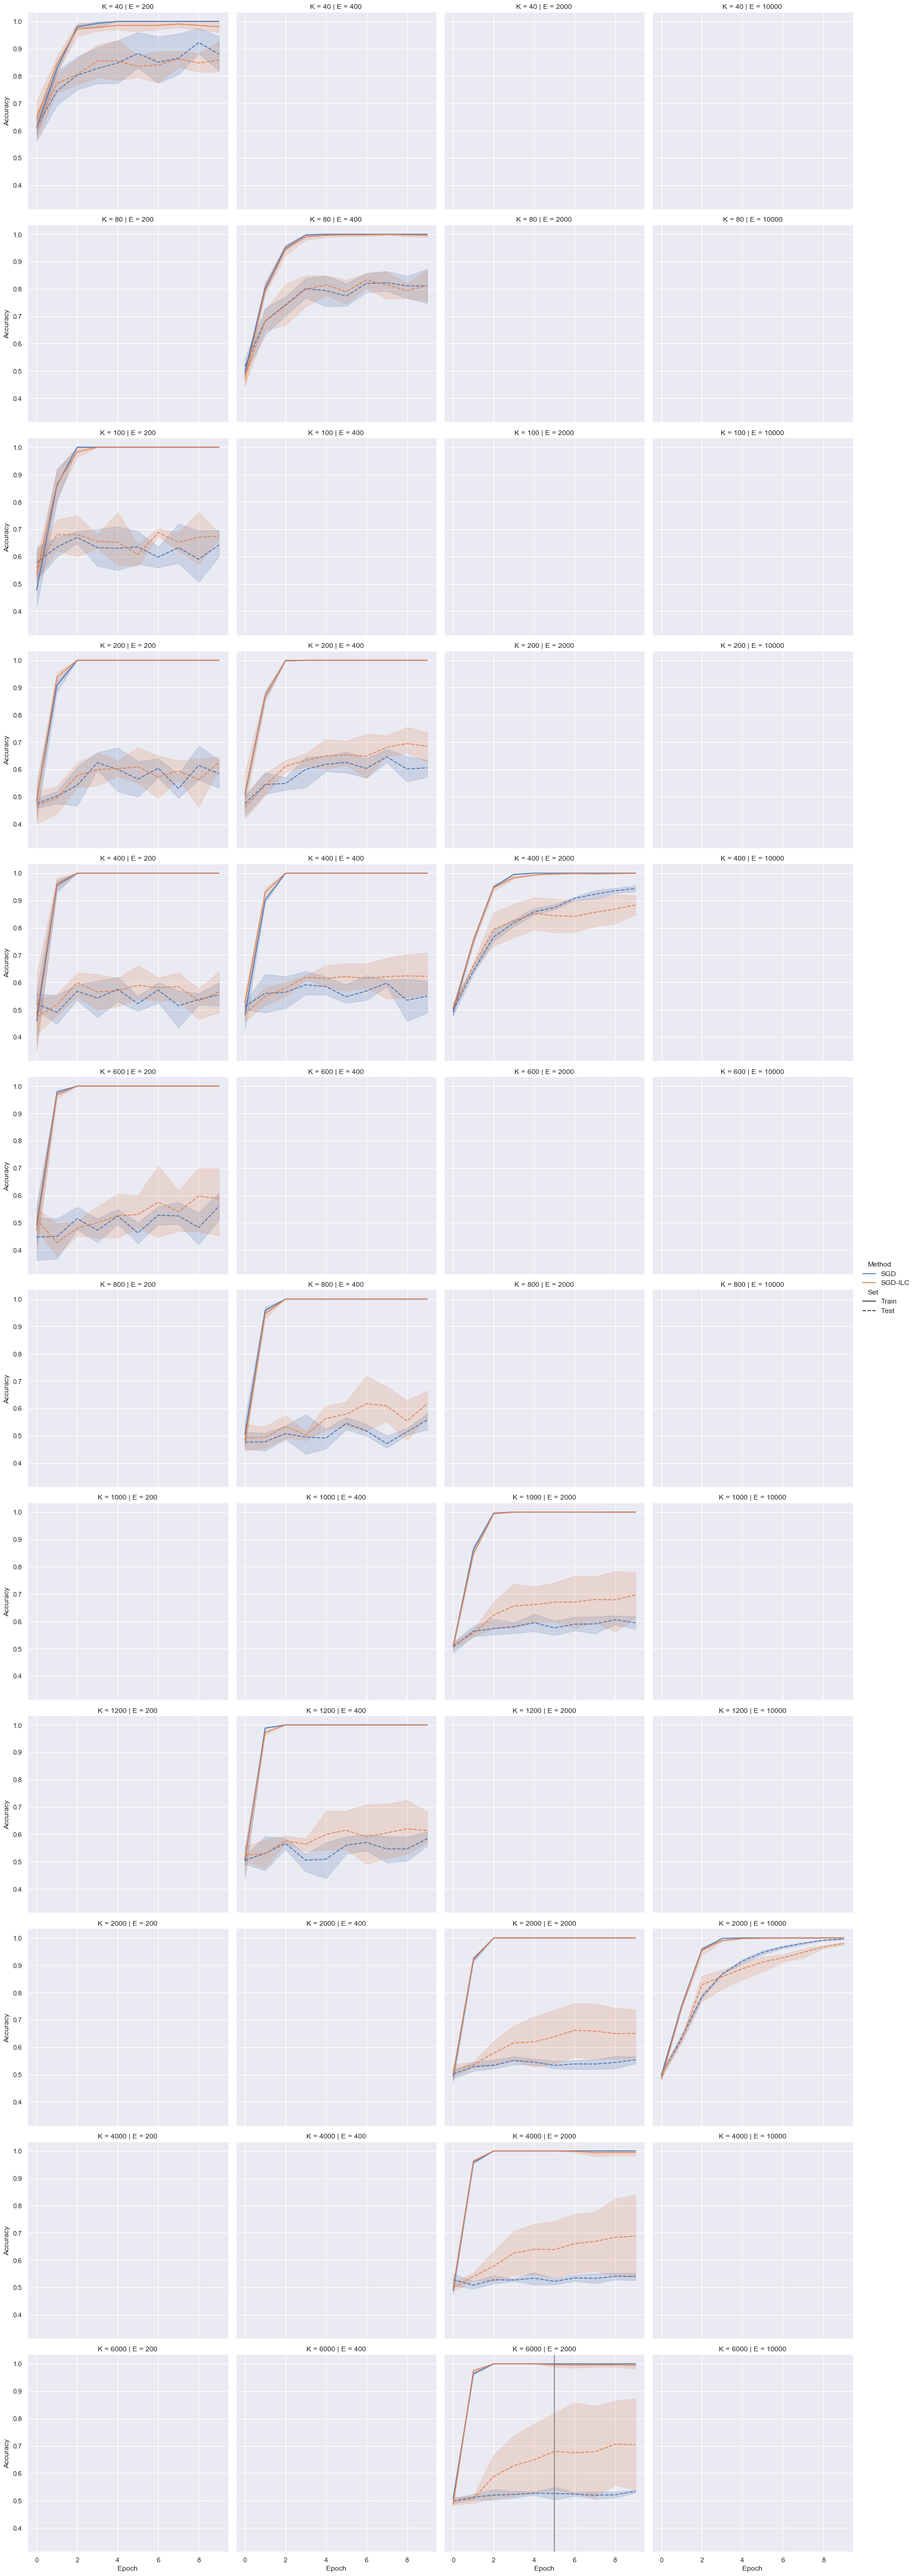

In [96]:
sn.set(rc={'figure.figsize': (20, 10)})
sn.relplot(
    data=syn_df, x="Epoch", y="Accuracy", col="E", row="K",
    hue="Method", style="Set", kind="line"
)
plt.axvline(5, 0, 1, color='grey')
plt.show()